# TMDB Box office prediction Modeling

## pipeline
### 1. load in data and import packages
### 2. Modeling
    2.1 Multiple Linear regression
    2.2 Decision Tree regression
    2.3 Random Forest regression
    2.4 Gradient Boosting regression
### 3. Model evaluation and selection
### 4. Prediction

## 1. load in data and import packages

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import collections
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn import model_selection
from sklearn.metrics import accuracy_score,mean_squared_error,mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import linear_model, preprocessing
import statsmodels.api as sm
from sklearn import tree, metrics
%matplotlib inline

In [2]:
file = '/Users/Sue/Documents/2020_study/springboard/capstone_project2_movie/Dataset/tmdb-box-office-prediction/1111_train_eda.csv'
df_train = pd.read_csv(file)
file_test = '/Users/Sue/Documents/2020_study/springboard/capstone_project2_movie/Dataset/tmdb-box-office-prediction/1111_test_eda.csv'
df_test = pd.read_csv(file_test)
df_train.head(3)

,budget,popularity,runtime,revenue,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_length,...,num_cast,genders_crew_0,genders_crew_1,genders_crew_2,num_crew,release_day,release_month,release_year,release_quarter,release_dayofweek
0,14000000,6.575393,93.0,12314651,0,1,0,0,0,1,...,24,59,0,13,72,20,2,2015,1,4
1,40000000,8.248895,113.0,95149435,1,1,0,0,1,4,...,20,1,4,4,9,6,8,2004,3,4
2,3300000,64.299990,105.0,13092000,1,0,0,0,0,1,...,51,49,4,11,64,10,10,2014,4,4


In [3]:
df_train.columns

Index(['budget', 'popularity', 'runtime', 'revenue', 'genre_Drama',
       'genre_Comedy', 'genre_Thriller', 'genre_Action', 'genre_Romance',
       'genre_length', 'original_language_en', 'comp_Warner Bros.',
       'comp_Universal Pictures', 'comp_Paramount Pictures',
       'comp_Twentieth Century Fox Film Corporation', 'comp_Columbia Pictures',
       'comp_Metro-Goldwyn-Mayer (MGM)', 'comp_New Line Cinema',
       'comp_Touchstone Pictures', 'comp_Walt Disney Pictures',
       'comp_Columbia Pictures Corporation', 'comp_TriStar Pictures',
       'comp_Relativity Media', 'comp_Canal+', 'comp_United Artists',
       'comp_Miramax Films', 'comp_Village Roadshow Pictures',
       'comp_Regency Enterprises', 'comp_ The', 'comp_BBC Films',
       'comp_Dune Entertainment', 'comp_Working Title Films',
       'comp_Fox Searchlight Pictures', 'comp_StudioCanal', 'comp_Lionsgate',
       'comp_DreamWorks SKG', 'comp_Fox 2000 Pictures',
       'comp_Summit Entertainment', 'comp_Hollywood Pic

# 2  Modeling

In [4]:
X = df_train.drop(['revenue'], axis = 1)
#y = df_train['revenue']
y = np.log1p(df_train['revenue'])
X_test = df_test

In [5]:
X = sm.add_constant(X)
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2)

In [6]:
X_test = sm.add_constant(X_test)

## 2.1 multiple linear regression
### first model we will try to fit multiple linear regression model

In [7]:
fstModel = sm.OLS(y_train, X_train)
fstModelpred = fstModel.fit()

In [8]:
fstModelpred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     20.35
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          2.56e-161
Time:                        16:14:03   Log-Likelihood:                -2943.1
No. Observations:                1582   AIC:                             6018.
Df Residuals:                    1516   BIC:                             6372.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          18.0772     10.086      1.792      0.073      -1.708      37.862
budget                                        1.56e-08    1.4e-09     11.152      0.000    1.29e-08    1.83e-08
popularity                                      0.0108      0.003      3.738      0.000       0.005       0.016
runtime                                         0.0048      0.002      1.915      0.056      -0.000       0.010
genre_Drama                                    -0.3371      0.100     -3.370      0.001      -0.533      -0.141
genre_Comedy                                    0.1321      0.108      1.224      0.221      -0.080       0.344
genre_Thriller                                 -0.1018      0.112     -0.912      0.362      -0.321       0.117
genre_Action                                    0.0639      0.114      0.563      0.573      -0.159       0.287
genre_Romance                                   0.2012      0.123      1.640      0.101      -0.039       0.442
genre_length                                    0.0718      0.049      1.454      0.146      -0.025       0.169
original_language_en                           -0.4689      0.254     -1.845      0.065      -0.968       0.030
comp_Warner Bros.                               0.7316      0.167      4.391      0.000       0.405       1.058
comp_Universal Pictures                         0.9516      0.169      5.615      0.000       0.619       1.284
comp_Paramount Pictures                         0.9737      0.182      5.354      0.000       0.617       1.330
comp_Twentieth Century Fox Film Corporation     0.7732      0.204      3.793      0.000       0.373       1.173
comp_Columbia Pictures                          1.0157      0.210      4.846      0.000       0.605       1.427
comp_Metro-Goldwyn-Mayer (MGM)                 -0.1490      0.280     -0.533      0.594      -0.697       0.399
comp_New Line Cinema                            1.0407      0.227      4.586      0.000       0.596       1.486
comp_Touchstone Pictures                        0.4061      0.269      1.508      0.132      -0.122       0.934
comp_Walt Disney Pictures                       1.0290      0.268      3.833      0.000       0.502       1.556
comp_Columbia Pictures Corporation             -0.4258      0.325     -1.308      0.191      -1.064       0.213
comp_TriStar Pictures                           0.7786      0.282      2.761      0.006       0.225       1.332
comp_Relativity Media                           0.5772      0.278      2.073      0.038       0.031       1.123
comp_Canal+                                     0.9159      0.327      2.805      0.005       0.275       1.556
comp_United Artists                             0.9916     

In [9]:
y_validpred = fstModelpred.predict(X_valid)

<Figure size 1728x1728 with 0 Axes>

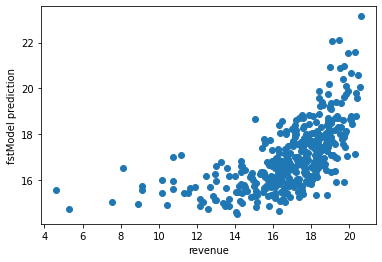

<Figure size 1728x1728 with 0 Axes>

In [10]:
plt.scatter(y_valid, y_validpred)
plt.xlabel('revenue')
plt.ylabel('fstModel prediction')
plt.figure(figsize=(24,24))

In [11]:
#use RMSE to check the model score
def rmse(y_pred, y_orig):
    return np.sqrt(np.mean((y_pred - y_orig)**2))

In [12]:
evaluation = pd.DataFrame()
evaluation['actual'] = y_valid
evaluation['multiple_linear_regression_prediction']= y_validpred
rmse(evaluation['multiple_linear_regression_prediction'],evaluation['actual'])

1.883626585078226

In [13]:
evaluation.head()

,actual,multiple_linear_regression_prediction
823,18.041048,16.013952
1078,18.172922,16.474647
1550,16.300417,15.843425
114,15.159291,15.341597
1069,16.401287,15.968013


the prediction is far from actual value. We will move forward to next model. 

## 2.2 Decision tree

In [14]:
scdModel = tree.DecisionTreeRegressor()
scdModel = scdModel.fit(X_train, y_train)
y_scdModelpred = scdModel.predict(X_valid)

In [15]:
evaluation['decision_tree_prediction']= y_scdModelpred
rmse(evaluation['decision_tree_prediction'],evaluation['actual'])

2.2965027432427774

In [16]:
evaluation

,actual,multiple_linear_regression_prediction,decision_tree_prediction
823,18.041048,16.013952,16.458443
1078,18.172922,16.474647,18.786826
1550,16.300417,15.843425,15.749474
114,15.159291,15.341597,14.187037
1069,16.401287,15.968013,12.976817
...,...,...,...
1179,17.362970,16.820105,16.732868
847,15.063787,18.688947,16.129405
1605,17.599700,18.700124,18.881065
299,18.957878,20.192218,16.134609


In [17]:
# Print the best parameters found
gridParams = {
    "max_depth": [5,6,7,8],
    "min_samples_leaf": [15,20,25,30],
    'random_state' : [501]
    }

grid_search = GridSearchCV(scdModel, n_jobs=-1, param_grid=gridParams, cv = 3, verbose=5)
grid_search.fit(X_train, y_train)
print('best parameters:', grid_search.best_params_)
print('best score:',grid_search.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.1s


best parameters: {'max_depth': 6, 'min_samples_leaf': 20, 'random_state': 501}
best score: 0.4471985599357562


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    3.5s finished


In [18]:
scdModel2 = tree.DecisionTreeRegressor(max_depth = 7, min_samples_leaf = 25, random_state = 501)
scdModel2 = scdModel2.fit(X_train, y_train)
y_scdModelpred = scdModel2.predict(X_valid)

In [19]:
evaluation['decision_tree_prediction']= y_scdModelpred
rmse(evaluation['decision_tree_prediction'],evaluation['actual'])

1.78541667651465

With the best parameters, decision tree score raised from 2.19 to 1.53, but still same level as multiple linear regression model(1.67).

In [20]:
evaluation

,actual,multiple_linear_regression_prediction,decision_tree_prediction
823,18.041048,16.013952,17.606323
1078,18.172922,16.474647,17.847581
1550,16.300417,15.843425,16.732625
114,15.159291,15.341597,14.360704
1069,16.401287,15.968013,16.118168
...,...,...,...
1179,17.362970,16.820105,16.432892
847,15.063787,18.688947,17.114168
1605,17.599700,18.700124,18.909658
299,18.957878,20.192218,18.724584


## 2.3 Random forest
Next model we would try is random forest regressor

In [21]:
trdModel = RandomForestRegressor()
gridParams = {
    "max_depth": [3,4,5,6,7,8],
    "n_estimators": [100,1000,5000, 10000]
    }

grid_search = GridSearchCV(trdModel, n_jobs=-1, param_grid=gridParams, cv = 3, verbose=5)
grid_search.fit(X_train, y_train)
print('best parameters:', grid_search.best_params_)
print('best score:',grid_search.best_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   49.9s
/Users/Sue/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 16.1min finished


best parameters: {'max_depth': 8, 'n_estimators': 10000}
best score: 0.5142066696743752


In [22]:
trdModel = RandomForestRegressor(max_depth = grid_search.best_params_['max_depth'],n_estimators = grid_search.best_params_['n_estimators'])

In [23]:
trdModel = trdModel.fit(X_train, y_train)
y_trdModelpred = trdModel.predict(X_valid)
evaluation['random_forest_prediction']= y_trdModelpred
rmse(evaluation['random_forest_prediction'],evaluation['actual'])

1.7022336497481725

random forest model improved score a bit higher.

In [24]:
#evaluation

## 2.4 Gradient boosting regression

In [25]:
fourModel = GradientBoostingRegressor()

In [26]:
gridParams = {
    "max_depth": [3,4,5,6,7,8],
    "learning_rate":[0.1, 0.01, 0.005],
    "n_estimators": [100, 1000, 10000],
    "min_samples_leaf": [1, 15,20,25,30],
    'random_state' : [501]
    }

grid_search = GridSearchCV(fourModel, n_jobs=-1, param_grid=gridParams, cv = 3, verbose=5)
grid_search.fit(X_train, y_train)
print('best parameters:', grid_search.best_params_)
print('best score:',grid_search.best_score_)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 70.0min finished


best parameters: {'learning_rate': 0.005, 'max_depth': 5, 'min_samples_leaf': 30, 'n_estimators': 1000, 'random_state': 501}
best score: 0.5379525120370717


In [27]:
fourModel = GradientBoostingRegressor(max_depth = grid_search.best_params_['max_depth'],n_estimators = grid_search.best_params_['n_estimators'], learning_rate = 0.005, min_samples_leaf = 30)

In [28]:
fourModel = fourModel.fit(X_train, y_train)
y_fourModelpred = fourModel.predict(X_valid)
evaluation['gradient_boosting_prediction']= y_fourModelpred
rmse(evaluation['gradient_boosting_prediction'],evaluation['actual'])

1.691616793532489

In [29]:
#evaluation

In [30]:
rmse_score_df = pd.DataFrame()
method = ['multiple_linear_regression', 'decision_tree','random_forest','gradient_boosting']
rmse_score=[]
for i in method:
    rmse_score.append(rmse(evaluation[i+'_prediction'],evaluation['actual']))

In [31]:
rmse_score_df = pd.DataFrame(rmse_score).transpose()
rmse_score_df.columns = method
rmse_score_df

,multiple_linear_regression,decision_tree,random_forest,gradient_boosting
0,1.883627,1.785417,1.702234,1.691617


Four models we tested, and random forest regressor give the best RMSE score. But all decision tree, random forest and gradient boosting methods' score are in the same level.

Next is to evaluate models with multiple folds of training data.

## 3. Model Evaluation

In [32]:
#Random forest
n_fold = 5
random_seed=2242
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)

prediction_rf = np.zeros(X_test.shape[0])
scores = []
feature_importance = pd.DataFrame()
for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X.values[train_index], X.values[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    model = RandomForestRegressor(max_depth = 8,n_estimators = 10000)
    model.fit(X_train, y_train)
            
    y_pred_valid = model.predict(X_valid)
    y_pred = model.predict(X_test)
    scores.append(mean_squared_error(y_valid, y_pred_valid) ** 0.5)
        
    prediction_rf += y_pred    

# feature importance
    fold_importance = pd.DataFrame()
    fold_importance["feature"] = X.columns
    fold_importance["importance"] = model.feature_importances_
    fold_importance["fold"] = fold_n + 1
    feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

prediction_rf /= n_fold
    
print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))

#print(prediction)

CV mean score: 1.5220, std: 0.1219.


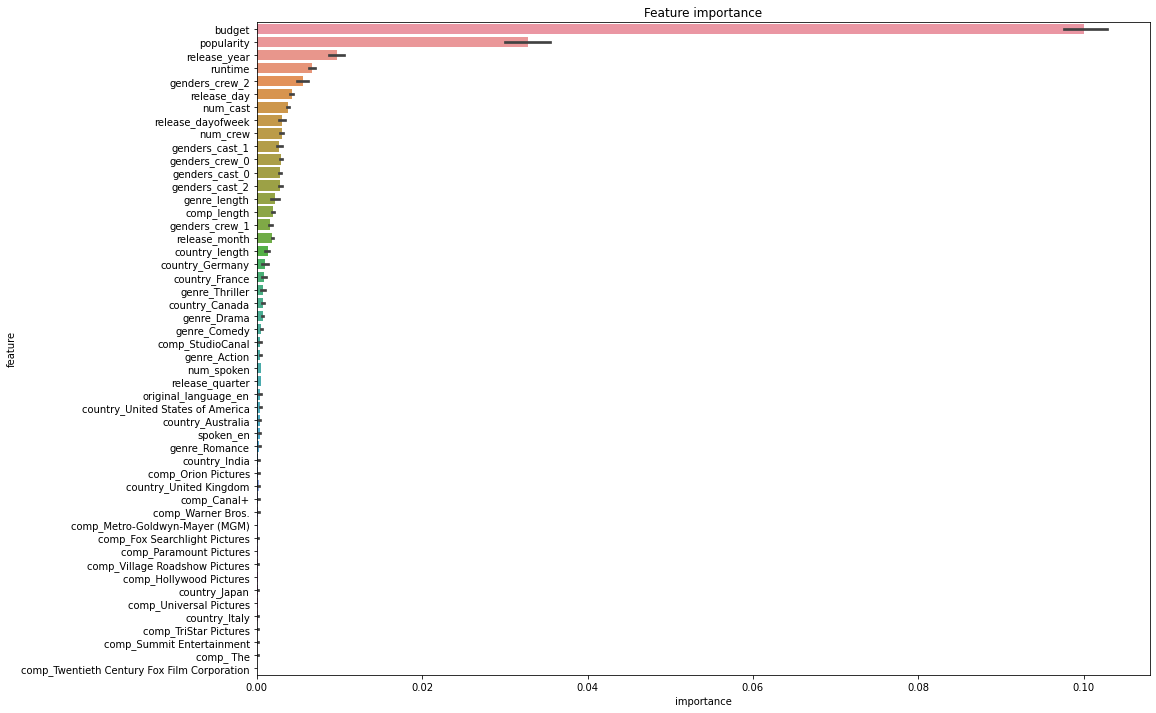

In [33]:
feature_importance['importance'] /= n_fold
cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:50].index

best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

plt.figure(figsize=(16, 12));
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
plt.title('Feature importance');

In [34]:
#gradient boosting regression
n_fold = 5
random_seed=2242
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)

prediction_gdb = np.zeros(X_test.shape[0])
scores = []
feature_importance = pd.DataFrame()
for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X.values[train_index], X.values[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    model = GradientBoostingRegressor(max_depth = 5,n_estimators = 1000, learning_rate = 0.005, min_samples_leaf = 30)
    model.fit(X_train, y_train)
            
    y_pred_valid = model.predict(X_valid)
    y_pred = model.predict(X_test)
    scores.append(mean_squared_error(y_valid, y_pred_valid) ** 0.5)
        
    prediction_gdb += y_pred    

prediction_gdb /= n_fold
    
print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))

#print(prediction)

CV mean score: 1.4839, std: 0.0995.


In [35]:
#Desicion tree
n_fold = 5
random_seed=2242
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)

prediction_tree = np.zeros(X_test.shape[0])
scores = []
feature_importance = pd.DataFrame()
for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X.values[train_index], X.values[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    model = tree.DecisionTreeRegressor()
    model.fit(X_train, y_train)
            
    y_pred_valid = model.predict(X_valid)
    y_pred = model.predict(X_test)
    scores.append(mean_squared_error(y_valid, y_pred_valid) ** 0.5)
        
    prediction_tree += y_pred    

prediction_tree /= n_fold
    
print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))

#print(prediction)


CV mean score: 2.2530, std: 0.0931.


In [36]:
cv_score = [np.NAN, 2.2365, 1.4839, 1.5222]
cv_score_df = pd.DataFrame(cv_score).transpose()
cv_score_df.columns = method
cv_score_df

,multiple_linear_regression,decision_tree,random_forest,gradient_boosting
0,NaN,2.2365,1.4839,1.5222


Based on cv score, we finally pick gradient boosting regression as final model.

## 4. Prediction

In [37]:
sub = pd.DataFrame()
sub['revenue'] = np.expm1(prediction_gdb)
sub.to_csv("/Users/Sue/Documents/2020_study/springboard/capstone_project2_movie/Dataset/tmdb-box-office-prediction/gdb.csv", index=False)

In [38]:
sub

,revenue
0,5.626292e+06
1,4.285431e+07
2,1.928663e+07
3,2.139196e+08
4,1.916997e+05
...,...
2878,7.168120e+08
2879,4.412183e+07
2880,4.968635e+07
2881,3.796108e+07
